In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


# Open access from subho's google drive
GOOGLE_SHEET_ID = '1oBmEgJ4pQIp-gxD-EMOYHVgvQxqZbZ4h9RgziQ7cqDQ'


sheet_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   GOOGLE_SHEET_ID +
                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
                   index_col=0
                  )
sheet_1.head(10)

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,
1,64/50624/2018,female,3.974,80.0,LSCS,polyhydramnios with scar tenderness,hypothyroidism,38.4,38.2,40
2,63/50624/2018,female,2.235,76.7,LSCS,prom with unfav cervix,-,38.0,37.0,38
3,65/50733/2018,male,2.245,70.0,LSCS,Iugr with less liquor,NaN,35.0,35.1,36
4,90/4818/2018,female,1.235,61.9,LSCS,NaN,NaN,32.0,31.2,32
5,91/4881/2018,male,3.377,79.7,LSCS,post-dated,NaN,40.0,38.2,38
6,103/31308/2018,male,2.367,71.8,FTND,NaN,psychiatric medication and hypothyroidism,36.0,36.0,34
7,106/51359/2018,female,3.166,79.3,FTND,NaN,NaN,39.2,38.2,38
8,109/6057/2018,male,3.025,80.1,LSCS,prom,-,39.3,38.0,40
9,111/51446/2018,female,2.375,75.5,LSCS,CPD,-,36.4,36.5,36


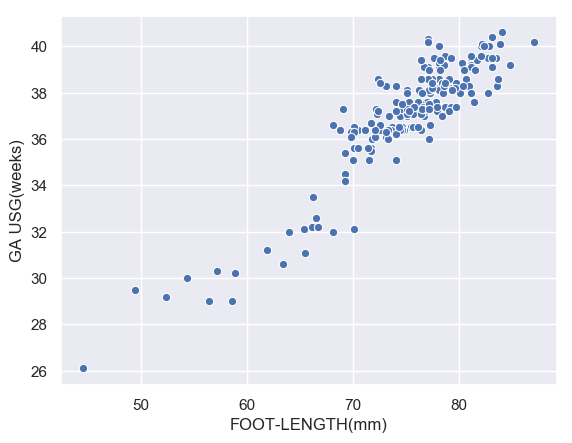

In [108]:
# sanity plots

sns.scatterplot(x="FOOT-LENGTH(mm)", y="GA USG(weeks)", data=sheet_1)

[9.60004213]
[[0.36569912]]


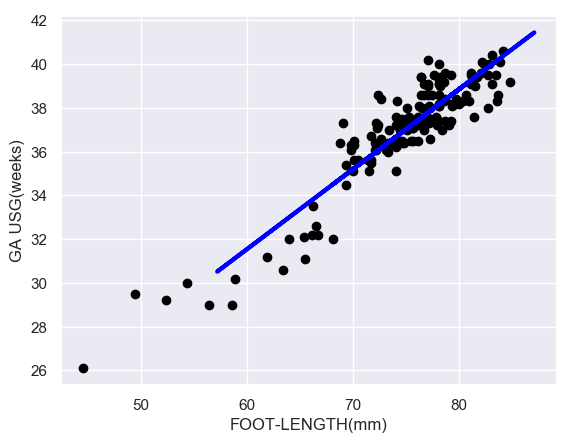

In [117]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
import numpy as np

length = 200

X = sheet_1.iloc[:, 3][:length].values 
y = sheet_1.iloc[:, 8][:length].values 
# print(X)
# print(y)
X = X.reshape(length, 1)
y = y.reshape(length, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = LinearRegression()
lr.fit(X_train, y_train) 
print(lr.intercept_)  
print(lr.coef_)
y_pred = lr.predict(X_test)  

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.ylabel("GA USG(weeks)")
plt.xlabel("FOOT-LENGTH(mm)")

plt.show()

[9.90659535]
[[0.36381622]]


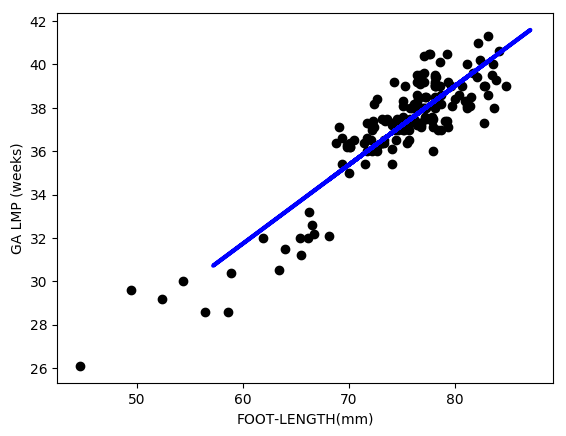

In [164]:
length = 200

X = sheet_1.iloc[:, 3][:length].values 
y = sheet_1.iloc[:, 7][:length].values 
# print(X)
# print(y)
X = X.reshape(length, 1)
y = y.reshape(length, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = LinearRegression()
lr.fit(X_train, y_train) 
print(lr.intercept_)  
print(lr.coef_)
y_pred = lr.predict(X_test)  

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.ylabel("GA LMP (weeks)")
plt.xlabel("FOOT-LENGTH(mm)")

plt.show()

[7.43725701]
[[0.39723424]]


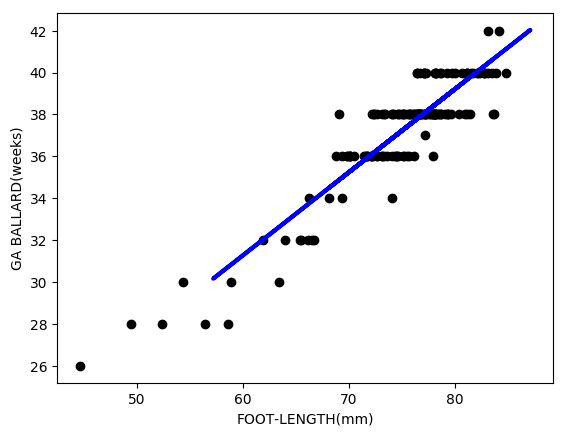

In [165]:
length = 200

X = sheet_1.iloc[:, 3][:length].values 
y = sheet_1.iloc[:, 9][:length].values 
# print(X)
# print(y)
X = X.reshape(length, 1)
y = y.reshape(length, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

lr = LinearRegression()
lr.fit(X_train, y_train) 
print(lr.intercept_)  
print(lr.coef_)
y_pred = lr.predict(X_test)  

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.ylabel("GA BALLARD(weeks)")
plt.xlabel("FOOT-LENGTH(mm)")

plt.show()

In [118]:
#List range of GA USG
F_length = list(range(57,83))
GA_usg = [lr.coef_[0][0]*x+lr.intercept_[0] for x in F_length]
df = pd.DataFrame()
df['Foot_length'] = F_length
df['GA_USG'] = GA_usg

df.head(len(GA_usg))

,Foot_length,GA_USG
0,57,30.444892
1,58,30.810591
2,59,31.176290
3,60,31.541989
4,61,31.907689
5,62,32.273388
6,63,32.639087
7,64,33.004786
8,65,33.370485
9,66,33.736184


In [119]:
# Get correlation coeff. r between GA_USG and Foot Length

sheet_1["FOOT-LENGTH(mm)"].corr(sheet_1["GA USG(weeks)"])

0.9147955514261469

In [145]:
sheet_1["FOOT-LENGTH(mm)"].corr(sheet_1["GA LMP (weeks)"])

0.8889123099613799

In [146]:
sheet_1["FOOT-LENGTH(mm)"].corr(sheet_1["GA BALLARD(weeks)"])

0.9059790828494109

In [157]:
sheet_1["FOOT-LENGTH(mm)"].std() 

6.212544530845529

In [158]:
sheet_1["FOOT-LENGTH(mm)"].mean()

75.137

In [160]:
sheet_1["GA USG(weeks)"].std() 

2.44873257135812

In [161]:
sheet_1["GA USG(weeks)"].mean() 

37.0845

In [162]:
import scipy
#pearson's co-relation
scipy.stats.pearsonr(X_train, y_train)

(array([0.92528999]), array([2.02914483e-68]))

In [163]:
#student T test
scipy.stats.ttest_ind(X_train, y_train)

Ttest_indResult(statistic=array([69.0756809]), pvalue=array([1.54723284e-193]))

In [122]:
#bracketing data

df = sheet_1.round({"GA USG(weeks)": 0}).sort_values(["GA USG(weeks)"], ascending=[1])
df.head()

,REGISTRATION/YEAR,GENDER,BIRTH WEIGHT(kg),FOOT-LENGTH(mm),MODE OF DELIVERY,INDICATION,MATERNAL HIGH RISK FACTORS,GA LMP (weeks),GA USG(weeks),GA BALLARD(weeks)
SL NO.,,,,,,,,,,
197,RG/1900624365,male,0.670,44.6,SVD,-,-,26.1,26.0,26
198,RG/1900436419,female,1.035,58.6,LSCS,PROM,-,28.6,29.0,28
196,RG/1900475694,female,0.894,52.4,LSCS,PROM,-,29.2,29.0,28
191,RG/1900415647,female,1.010,56.4,SVD,-,-,28.6,29.0,28
195,RG/1900235634,male,1.122,58.9,SVD,-,-,30.4,30.0,30


In [123]:
new_df = pd.DataFrame()
new_df["GA USG(weeks)"] = df.groupby("GA USG(weeks)")["GA USG(weeks)"].mean().values
new_df["count"] = df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].count().values

new_df["FOOT-LENGTH(mm)_mean"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].mean().values
new_df["FOOT-LENGTH(mm)_std"]= df.groupby("GA USG(weeks)")["FOOT-LENGTH(mm)"].std().values

new_df["BIRTH WEIGHT(kg)_mean"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].mean().values
new_df["BIRTH WEIGHT(kg)_std"]= df.groupby("GA USG(weeks)")["BIRTH WEIGHT(kg)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA LMP (weeks)_mean"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].mean().values
new_df["GA LMP (weeks)_std"]= df.groupby("GA USG(weeks)")["GA LMP (weeks)"].std().values

new_df["GA BALLARD(weeks)_mean"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].mean().values
new_df["GA BALLARD(weeks)_std"]= df.groupby("GA USG(weeks)")["GA BALLARD(weeks)"].std().values

new_df.head(20)

,GA USG(weeks),count,FOOT-LENGTH(mm)_mean,FOOT-LENGTH(mm)_std,BIRTH WEIGHT(kg)_mean,BIRTH WEIGHT(kg)_std,GA LMP (weeks)_mean,GA LMP (weeks)_std,GA BALLARD(weeks)_mean,GA BALLARD(weeks)_std
0,26.0,1,44.600000,NaN,0.670000,NaN,26.100000,NaN,26.000000,NaN
1,29.0,3,55.800000,3.143247,0.979667,0.075235,28.800000,0.346410,28.000000,0.000000
2,30.0,4,55.000000,4.109339,0.964000,0.136438,30.025000,0.330404,29.500000,1.000000
3,31.0,3,63.600000,1.808314,1.242333,0.011846,31.233333,0.750555,31.333333,1.154701
4,32.0,6,66.733333,2.137912,1.436500,0.180130,31.966667,0.242212,32.333333,0.816497
5,33.0,1,66.500000,NaN,1.325000,NaN,32.600000,NaN,32.000000,NaN
6,34.0,3,68.266667,1.789786,1.855333,0.436768,35.366667,1.882374,34.000000,0.000000
7,35.0,4,71.225000,2.125049,2.246000,0.063880,35.300000,0.200000,35.500000,1.000000
8,36.0,35,72.780000,2.129595,2.394543,0.261619,36.628571,0.494423,36.228571,0.807528
9,37.0,42,75.507143,2.476169,2.656500,0.269428,37.326190,0.608501,37.523810,0.968733


In [124]:
sheet_1["BIRTH WEIGHT(kg)"].corr(sheet_1["GA USG(weeks)"])

0.8943452680836967

In [126]:
fl_test = sheet_1.iloc[:, 3][155:187].values 
ga_usg_org =  sheet_1.iloc[:, 8][155:187].values 
ga_model = [lr.coef_[0][0]*x+lr.intercept_[0] for x in fl_test]
ga_lmp = sheet_1.iloc[:, 7][155:187].values 
ga_ballard = sheet_1.iloc[:, 9][155:187].values 

print(scipy.stats.pearsonr(ga_usg_org, ga_usg_model))
print(scipy.stats.pearsonr(ga_lmp, ga_usg_model))

ga_ballard_err = []
i=0
for x in ga_model:
    error_percent = (x - ga_ballard[i])/ga_ballard[i] * 100
    ga_ballard_err.append(error_percent)
    i+=1
ga_ballard_err

print(np.mean(ga_ballard_err))
ga_lmp_err = []
i=0
for x in ga_model:
    error_percent = (x - ga_lmp[i])/ga_lmp[i] * 100
    ga_lmp_err.append(error_percent)
    i+=1
ga_lmp_err
print(np.mean(ga_lmp_err))

NameError: name 'ga_usg_model' is not defined

In [127]:
sheet_1["GA BALLARD(weeks)"].corr(sheet_1["GA USG(weeks)"])

0.9541659047555912

In [132]:
male=sheet_1[sheet_1["GENDER"] == 'male'].shape[0]
print(male)

97


In [133]:
female=sheet_1[sheet_1["GENDER"] == 'female'].shape[0]
print(female)

103


# Distribution of Gender of the newborns

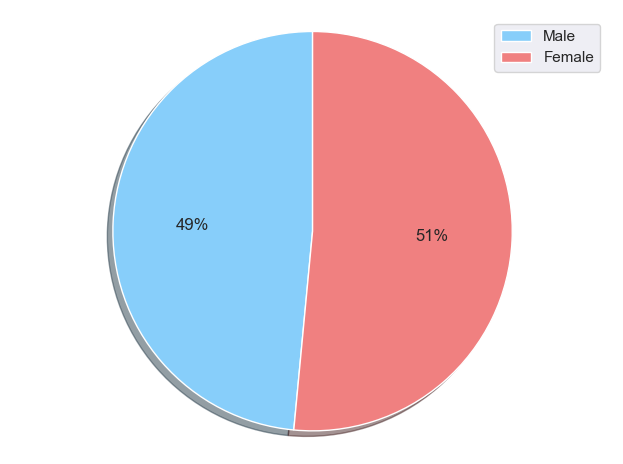

In [134]:
labels = ['Male', 'Female',]
sizes = [male, female]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.0f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Distribution of gestational age of the newborns

In [147]:
start= 26
end=26.5
map_=[]

while end < 42:
    count =0
    sum = 0
    for index, row in sheet_1.iterrows():
        if start< row['GA USG(weeks)'] <=end:
            count+=1
            sum+=row['FOOT-LENGTH(mm)']
    obj={}
    obj['range']=str(start)+'-'+str(end)
    obj['count'] = count
    if count>0:
        obj['avg_foot_length'] = sum/count
    else:
        obj['avg_foot_length'] = 0
    map_.append(obj)
    end+=0.5
    start+=0.5
    
print(map_)

[{'range': '26-26.5', 'count': 1, 'avg_foot_length': 44.6}, {'range': '26.5-27.0', 'count': 0, 'avg_foot_length': 0}, {'range': '27.0-27.5', 'count': 0, 'avg_foot_length': 0}, {'range': '27.5-28.0', 'count': 0, 'avg_foot_length': 0}, {'range': '28.0-28.5', 'count': 0, 'avg_foot_length': 0}, {'range': '28.5-29.0', 'count': 2, 'avg_foot_length': 57.5}, {'range': '29.0-29.5', 'count': 2, 'avg_foot_length': 50.95}, {'range': '29.5-30.0', 'count': 1, 'avg_foot_length': 54.4}, {'range': '30.0-30.5', 'count': 2, 'avg_foot_length': 58.05}, {'range': '30.5-31.0', 'count': 1, 'avg_foot_length': 63.4}, {'range': '31.0-31.5', 'count': 2, 'avg_foot_length': 63.7}, {'range': '31.5-32.0', 'count': 2, 'avg_foot_length': 66.05}, {'range': '32.0-32.5', 'count': 4, 'avg_foot_length': 67.075}, {'range': '32.5-33.0', 'count': 1, 'avg_foot_length': 66.5}, {'range': '33.0-33.5', 'count': 1, 'avg_foot_length': 66.2}, {'range': '33.5-34.0', 'count': 0, 'avg_foot_length': 0}, {'range': '34.0-34.5', 'count': 2, 

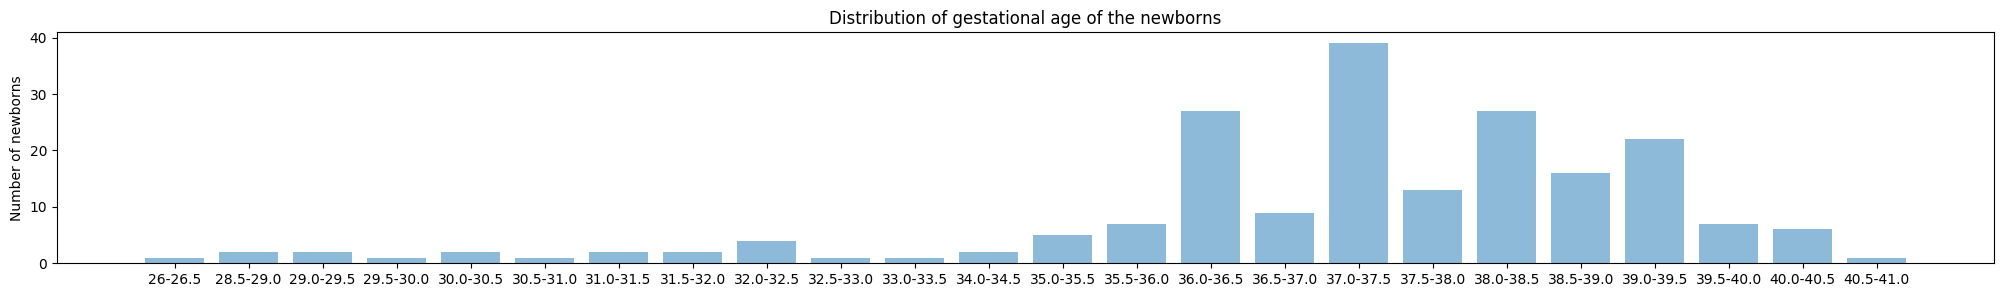

In [156]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ()
count=[]
for obj in map_:
    if obj['count']>0:
        objects=objects+(str(obj['range']),)
        count.append(int(obj['count']))
y_pos = np.arange(len(objects))
plt.figure(figsize=(25, 3))  #
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of newborns')
plt.title('Distribution of gestational age of the newborns')

plt.show()

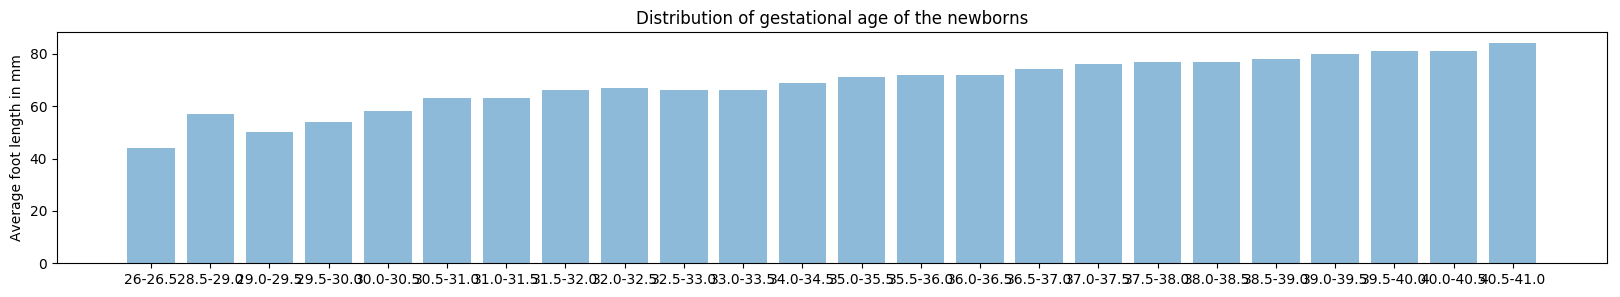

In [154]:
objects = ()
avg=[]
for obj in map_:
    if obj['count']>0:
        objects=objects+(str(obj['range']),)
        avg.append(int(obj['avg_foot_length']))
plt.figure(figsize=(20, 3))  #
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average foot length in mm')
plt.title('Distribution of gestational age of the newborns')

plt.show()

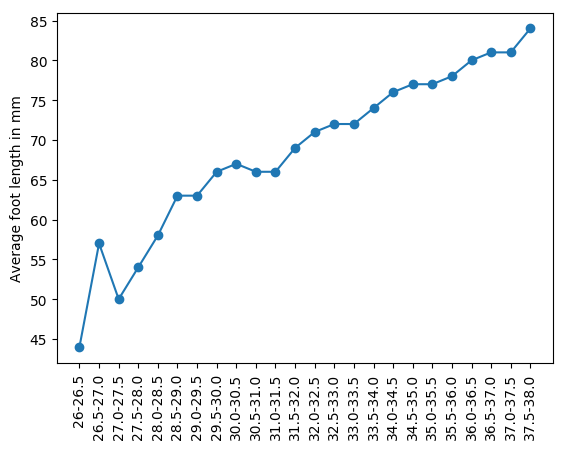

In [153]:
y_pos = []
avg = []

for obj in map_:
    if obj['count']>0:
        y_pos.append(obj['range'])
        avg.append(int(obj['avg_foot_length']))
plt.scatter(y_pos, avg)
plt.plot(y_pos, avg)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Average foot length in mm')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [141]:
sum=0
for obj in map_:
    sum=sum+int(obj['count'])

print(sum)

200
